# Confidence Intervals and bootstrapping

SG2227 Saleh Rezaeiravesh and Philipp Schlatter

In [213]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2
from scipy.stats import t,norm

π = mt.pi

In [214]:
# Set the confidence level
α = 0.05

The random variable 

$$z =\frac{\overline{x}-\mu}{\sigma/\sqrt{n}}$$

is normally distributed with $\mu=\sigma=1$. However, when using the sample variance $\hat{s}$,

$$\hat{z}=\frac{\overline{x}-\mu}{\hat{s}/\sqrt{n}}$$

has a student's t distribution with $n-1$ degrees of freedom. Since only $\mu$ cannot be observed, we may use the distribution to compute confidence intervals for the mean.

In [215]:
# Compute the cricital cdf level z_alpha from the t-distribution for a two-tailed test with α
NN=20
t_crit_tab=np.zeros((NN,2))
for tdof in range(NN):
    t_crit_tab[tdof,0] = tdof+1
    t_crit_tab[tdof,1] = np.abs(t.ppf(α/2,tdof+1))   
t_crit_tab

array([[ 1.        , 12.70620474],
       [ 2.        ,  4.30265273],
       [ 3.        ,  3.18244631],
       [ 4.        ,  2.77644511],
       [ 5.        ,  2.57058184],
       [ 6.        ,  2.44691185],
       [ 7.        ,  2.36462425],
       [ 8.        ,  2.30600414],
       [ 9.        ,  2.26215716],
       [10.        ,  2.22813885],
       [11.        ,  2.20098516],
       [12.        ,  2.17881283],
       [13.        ,  2.16036866],
       [14.        ,  2.14478669],
       [15.        ,  2.13144955],
       [16.        ,  2.1199053 ],
       [17.        ,  2.10981558],
       [18.        ,  2.10092204],
       [19.        ,  2.09302405],
       [20.        ,  2.08596345]])

In [216]:
['infinity',np.abs(norm.ppf(α/2))]

['infinity', 1.9599639845400545]

### Use the t and normal distribution on some data

For small $N<30$, there is a difference between using the t or the normal distribution to calculate the critical $t_\alpha$ (or $z_\alpha$) values. For higher values, the normal distribution can be taken giving the same critical values.

In [217]:
def bimodal(N):
    toss = np.random.randint(0,2,size=N)
    a=np.zeros((N,2))
    a[:,0]= np.random.normal(-5, 2.5, N)
    a[:,1]= 0.5*np.random.normal( 5, 2.5, N)
    b=np.zeros(N)
    for k in range(N):
        b[k] = a[k,int(toss[k])]
    return b

In [218]:
# Some data for a sample
N = 2000
x = np.sin(np.random.normal(size=N)**(2) )  # something nonlinear
#x = bimodal(N)
#x = np.random.normal(size=N)   # something normal
#x = np.random.random_sample(N)

<IPython.core.display.Javascript object>


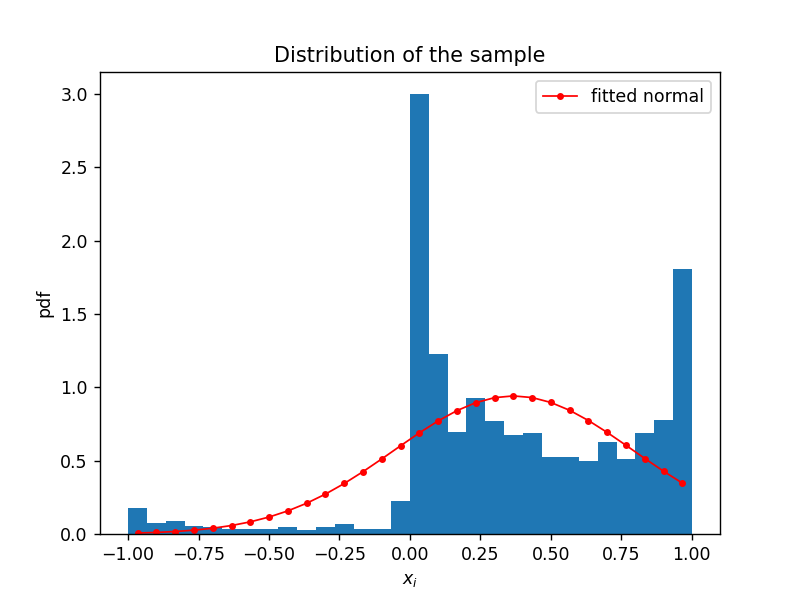

In [219]:
nbins = 30  # number of bins

plt.figure()
plt.title('Distribution of the sample')
count, bins, ignored = plt.hist(x, nbins, density=True)
#count, bins = np.histogram(s, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(x),np.std(x)), '.-',linewidth=1, color='r',label='fitted normal')
plt.xlabel('$x_i$');plt.ylabel('pdf')
plt.legend()
plt.show()

In [220]:
# computing the confidence interval using the t-distribution
tdof = len(x)-1 
t_crit = np.abs(t.ppf(α/2,tdof))
m = x.mean() 
s = x.std() 
('t distribution',m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 

('t distribution', 0.349184142767311, 0.38633899108332015)

In [221]:
# computing the confidence interval using the normal-distribution
tdof = len(x)-1 
z_alpha = np.abs(norm.ppf(α/2))
m = x.mean() 
s = x.std() 
('normal distribution',m-s*z_alpha/np.sqrt(len(x)), m+s*z_alpha/np.sqrt(len(x))) 

('normal distribution', 0.34919539100400576, 0.3863277428466254)

### "experimental" approach: Bootstrapping

The alternative is to simply use a *bootstrap method* (resampling with replacement), running $B$ times. Simply based on one sample, the whole distribution can be recovered as shown below. This method works for any distribution and any parameter, here shown using the mean as an example which will, according to the CLT yield a normal distribution.

The bootstrapping method works best for larger $N$ in order to yield a good approximation of the distribution. Typically, $B=10000$ repetitions are used.

In [225]:
# now doing everything with a bootstrap
B=10000
values = [np.random.choice(x, size=len(x), replace=True).mean() for i in range(B)] 
('bootstrapping',np.percentile(values,[100*α/2,100*(1-α/2)]) )

('bootstrapping', array([0.34923675, 0.38654246]))

In [226]:
('mean',m)

('mean', 0.3677615669253156)

<IPython.core.display.Javascript object>


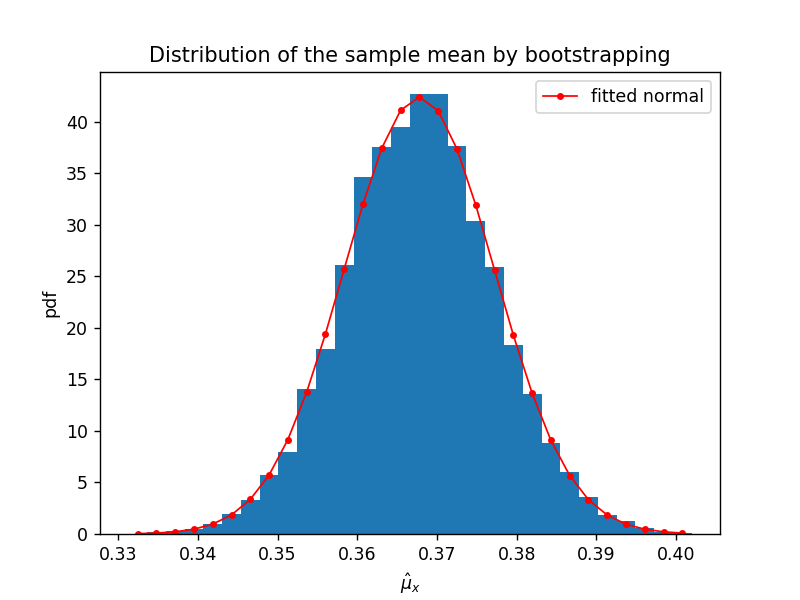

In [227]:
nbins = 30  # number of bins

plt.figure()
plt.title('Distribution of the sample mean by bootstrapping')
count, bins, ignored = plt.hist(values, nbins, density=True)
#count, bins = np.histogram(s, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(values),np.std(values)), '.-',linewidth=1, color='r',label='fitted normal')
plt.xlabel('$\hat{\mu}_x$');plt.ylabel('pdf')
plt.legend()
plt.show()